In [1]:
import ubermag
print(ubermag.__version__)
import matplotlib as plt
#from tensorflow import keras
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import os
import time
import csv

import tqdm
import discretisedfield as df
import micromagneticmodel as mm
import matplotlib.pyplot as plt

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import tqdm
import itertools
import warnings

import numpy as np

import discretisedfield as df
import discretisedfield.util as dfu
import discretisedfield.tools as dft
#from magnum import *

0.62.0


In [10]:
sample = "rectangular" # in study used: rectangular

In [11]:
ntlist =[10, 20, 30, 40]#
a = 0.4679e-9
dlist = [50*a/x for x in ntlist]

maxangles=[]
maxanglesarg=[]
for nt in ntlist:
    path = "BP/MM_"+str(sample)+"/BP_relaxed_nt_"+str(nt)+".omf"
    field = df.Field.fromfile(path)
    angles = dft.max_neigbouring_cell_angle(field, units="deg")
    numpyangles = angles.array
    #print(angles)
    maxa = np.amax(numpyangles)
    maxarg = np.argmax(numpyangles)
    maxanglesarg.append(maxarg)
    maxangles.append(maxa)
if False:
    plt.plot(dlist, maxangles)
    plt.show()

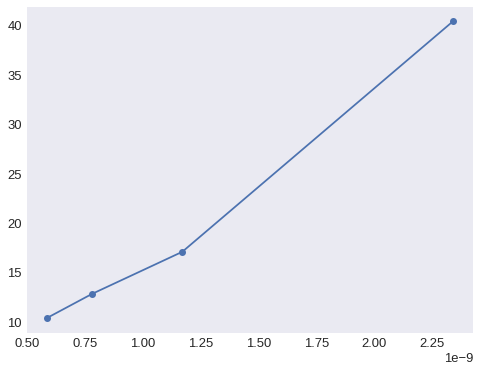

In [12]:
ntlistV =[10, 20, 30,40] # in study: [10, 20, 30, 40, 50, 60, 70]
a = 0.4679e-9
dlistV = [50*a/x for x in ntlistV]

maxanglesV=[]
maxanglesargV=[]
for nt in ntlistV:
    path = "BV/MM_"+str(sample)+"/BV_relaxed_nt_"+str(nt)+".omf"
    field = df.Field.fromfile(path)
    anglesV = dft.max_neigbouring_cell_angle(field, units="deg")
    numpyanglesV = anglesV.array
    maxaV = np.amax(numpyanglesV)
    maxargV = np.argmax(numpyanglesV)

    maxanglesargV.append(maxargV)
    maxanglesV.append(maxaV)
if True:
    plt.plot(dlistV, maxanglesV, "o-")
    plt.show()

In [13]:
if False: # set True if HB_rectangular data is available
    ntlistHB =[ 50]
    a = 0.4679e-9
    
    HBmaxangles=[]
    HBmaxanglesarg=[]
    for nt in ntlistHB:
        path = "BP/HB_"+str(sample)+"/BP_relaxed_nt_"+str(nt)+".omf"
        field = df.Field.fromfile(path)
        HBangles = dft.max_neigbouring_cell_angle(field, units="deg")
        HBnumpyangles = HBangles.array
        
        HBmaxa = np.amax(HBnumpyangles)
        HBmaxarg = np.argmax(HBnumpyangles)
        
        if False:
            print(angles)
            print(HBmaxa)
            plt.hist(np.ravel(HBnumpyangles))
            plt.yscale("log")
            plt.ylabel("#")
            plt.xlabel("angle [degree]")
            plt.title("histogram of angles in HB configuration")
            plt.show()
            plt.imshow(HBnumpyangles[nt*2,:,:,0], vmin=0, vmax=180)
            plt.colorbar()
            plt.show()
            plt.imshow(HBnumpyangles[:,:,0,0], vmin=0, vmax=180)
            plt.colorbar()
            plt.show()


In [14]:
if False: # set True if HB_rectangular data is available
    ntlistHB =[ 50]
    a = 0.4679e-9
    
    VHBmaxangles=[]
    VHBmaxanglesarg=[]
    for nt in ntlistHB:
        path = "BV/HB_"+str(sample)+"/BV_relaxed_nt_"+str(nt)+".omf"
        field = df.Field.fromfile(path)
        VHBangles = dft.max_neigbouring_cell_angle(field, units="deg")
        VHBnumpyangles = VHBangles.array
        #print(angles)
        VHBmaxa = np.amax(VHBnumpyangles)
        VHBmaxarg = np.argmax(VHBnumpyangles)
    
        if False:
            plt.hist(np.ravel(VHBnumpyangles))
            plt.yscale("log")
            plt.ylabel("#")
            plt.xlabel("angle [degree]")
            plt.title("histogram of angles in HB configuration")
            plt.show()
            plt.imshow(VHBnumpyangles[nt*2,:,:,0], vmin=0, vmax=180)
            plt.colorbar()
            plt.show()
            plt.imshow(VHBnumpyangles[:,:,0,0], vmin=0, vmax=180)
            plt.colorbar()
            plt.show()

In [15]:
from scipy.optimize import curve_fit
def invFit(x,a,b):
    y = a/x+b
    return y
def invFit2(x,a,b):
    y = a/np.sqrt(x)+b
    return y

# Plotting remarks:
We show the plots only for the MM data that is available in this repository.


[ 9.92489543 76.93149286]
[[ 0.71081662 -0.86612266]
 [-0.86612266  1.3846342 ]]
[17.40040232 -1.02612164]
[[ 1.9318946  -2.35399334]
 [-2.35399334  3.76323051]]


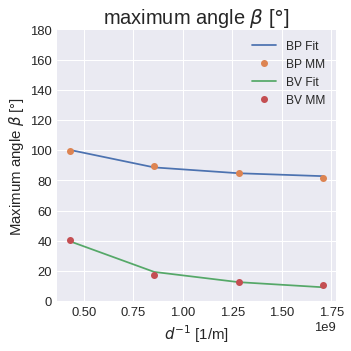

In [17]:
# plot max. angle plot, Fig. 3 b) 
dlistinv = [1/d for d in dlist]
Vdlistinv = [1/d for d in dlistV]

ainv = 1/a
cut=2
cut2=0

cut=0
cut2=0
xdata = [d*1e-9 for d in dlistinv[cut:]] 
ydata = maxangles[cut:]
xdataV = [d*1e-9 for d in Vdlistinv[cut2:]] 
ydataV = maxanglesV[cut2:]

parameters, covariance = curve_fit(invFit, xdata, ydata)
parametersV, covarianceV = curve_fit(invFit, xdataV, ydataV)
print(parameters)
print(covariance)
print(parametersV)
print(covarianceV)
plt.figure(figsize=(5,5))
plt.plot(dlistinv[cut:],invFit(xdata, parameters[0], parameters[1]), label="BP Fit")

plt.plot(dlistinv, maxangles,"o", label="BP MM")
plt.plot(Vdlistinv[cut2:],invFit(xdataV, parametersV[0], parametersV[1]), label="BV Fit")

plt.plot(Vdlistinv, maxanglesV,"o", label="BV MM")

plt.ylim(0,110)
plt.ylabel(r"Maximum angle $\beta$ [°]")
plt.legend()
plt.xlabel(r"$d^{-1}$ [1/m]")
plt.ylim(0, 180)
plt.grid()
plt.title(r"maximum angle $\beta$ [$\degree$]")
plt.savefig("../Figures/Fig_3b_angle.svg", dpi=400, bbox_inches="tight")
plt.show()

# Plotting remarks:
If all data is availbale, you can run the next cell including HB results.


[ 9.92489543 76.93149286]
[[ 0.71081662 -0.86612266]
 [-0.86612266  1.3846342 ]]
[17.40040232 -1.02612164]
[[ 1.9318946  -2.35399334]
 [-2.35399334  3.76323051]]


NameError: name 'HBmaxa' is not defined

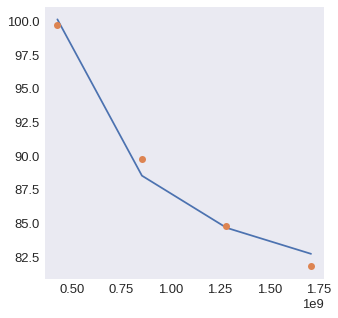

In [19]:
# plot max. angle plot, Fig. 3 b) 
dlistinv = [1/d for d in dlist]
Vdlistinv = [1/d for d in dlistV]

ainv = 1/a
cut=2
cut2=0

cut=0
cut2=0
xdata = [d*1e-9 for d in dlistinv[cut:]] 
ydata = maxangles[cut:]
xdataV = [d*1e-9 for d in Vdlistinv[cut2:]] 
ydataV = maxanglesV[cut2:]

parameters, covariance = curve_fit(invFit, xdata, ydata)
parametersV, covarianceV = curve_fit(invFit, xdataV, ydataV)
print(parameters)
print(covariance)
print(parametersV)
print(covarianceV)
plt.figure(figsize=(5,5))
plt.plot(dlistinv[cut:],invFit(xdata, parameters[0], parameters[1]), label="BP Fit")

plt.plot(dlistinv, maxangles,"o", label="BP MM")
plt.plot(ainv, HBmaxa,"X", color="red", markersize=10, label="BP HB")
plt.plot(Vdlistinv[cut2:],invFit(xdataV, parametersV[0], parametersV[1]), label="BV Fit")

plt.plot(Vdlistinv, maxanglesV,"o", label="BV MM")
plt.plot(ainv, VHBmaxa,"X",color="blue",markersize=10, label="BV HB")
plt.ylim(0,110)
plt.ylabel(r"Maximum angle $\beta$ [°]")
plt.legend()
plt.xlabel(r"$d^{-1}$ [1/m]")
plt.ylim(0, 180)
plt.grid()
plt.title(r"maximum angle $\beta$ [$\degree$]")
plt.savefig("../Figures/Fig_3b_angle.svg", dpi=400, bbox_inches="tight")
plt.show()